In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import re
import random

In [2]:
linkedin_df = pd.read_csv('./machine_learning/linkedin_job_postings.csv')

In [3]:
linkedin_df.head(10)

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",...,NaN,Entry level,NaN,1.699090e+12,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,1699138101
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",...,NaN,NaN,NaN,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085420
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",...,NaN,NaN,Bachelor's Degree in Mechanical Engineering pr...,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085644
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",...,NaN,Entry level,NaN,1.699080e+12,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,1699087461
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.0,NaN,205956.0,YEARLY,Full-time,United States,...,NaN,Mid-Senior level,NaN,1.699090e+12,careers.iherb.com,0,FULL_TIME,USD,BASE_SALARY,1699085346
5,3757937037,13727.0,Territory Manager - New Haven,"Location: Remote, CT, United States of America...",NaN,NaN,NaN,NaN,Full-time,United States,...,1.700000e+12,Mid-Senior level,NaN,1.699080e+12,www.zoll.com,0,FULL_TIME,NaN,NaN,1699137801
6,3757937004,10515052.0,Auto Body Techncian,Company: Gerber Collision & Glass\n\nWELCOME T...,NaN,NaN,NaN,NaN,Full-time,"Daytona Beach, FL",...,NaN,Entry level,NaN,1.699080e+12,boydgroup.wd1.myworkdayjobs.com,0,FULL_TIME,NaN,NaN,1699089473
7,3757936167,2915.0,"ACME D8- Asst Store Director (ASD) Sussex, NJ",The First Assistant Store Director is actively...,NaN,NaN,NaN,NaN,Full-time,"Sussex, NJ",...,NaN,Mid-Senior level,NaN,1.699090e+12,eofd.fa.us6.oraclecloud.com,0,FULL_TIME,NaN,NaN,1699138852
8,3757936097,18213359.0,Dishwasher,"descriptionTitle\n\n $2,000 Sign-on Bonus Guar...",NaN,19.30,NaN,HOURLY,Full-time,"Aliso Viejo, CA",...,NaN,Entry level,NaN,1.699080e+12,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,1699089324
9,3757936026,634806.0,Instrumentation Quality Control Representative...,Instrumentation Quality Control Representative...,NaN,NaN,NaN,NaN,Contract,United States,...,NaN,Entry level,NaN,1.699130e+12,jobs.stsigroup.com,0,CONTRACT,NaN,NaN,1699137876


In [4]:
linkedin_df['company_id'].dtype

dtype('float64')

In [5]:
#fill in the missing company_id rows with random company_id of the column
linkedin_df['company_id'] = linkedin_df['company_id'].apply(lambda x: random.choice(linkedin_df['company_id'].dropna().unique()) if pd.isna(x) else x)

In [6]:
null_columns = [linkedin_df[column].isnull().value_counts() for column in linkedin_df.columns ]
print(null_columns)

[job_id
False    33246
Name: count, dtype: int64, company_id
False    33246
Name: count, dtype: int64, title
False    33246
Name: count, dtype: int64, description
False    33245
True         1
Name: count, dtype: int64, max_salary
True     22135
False    11111
Name: count, dtype: int64, med_salary
True     31005
False     2241
Name: count, dtype: int64, min_salary
True     22135
False    11111
Name: count, dtype: int64, pay_period
True     19894
False    13352
Name: count, dtype: int64, formatted_work_type
False    33246
Name: count, dtype: int64, location
False    33246
Name: count, dtype: int64, applies
True     17008
False    16238
Name: count, dtype: int64, original_listed_time
False    33246
Name: count, dtype: int64, remote_allowed
True     28444
False     4802
Name: count, dtype: int64, views
False    25886
True      7360
Name: count, dtype: int64, job_posting_url
False    33246
Name: count, dtype: int64, application_url
False    20996
True     12250
Name: count, dtype: int64, a

In [7]:
# fill in formatted_experience_level's nulls values with the most frequent value
most_frequent_value = linkedin_df['formatted_experience_level'].mode()[0]
print(most_frequent_value)

linkedin_df['formatted_experience_level'] = linkedin_df['formatted_experience_level'].fillna(most_frequent_value)


Mid-Senior level


In [8]:
linkedin_df['company_id'].dtype

dtype('float64')

In [9]:
#fill the null max_salary,med_salary and min_salary  rows with the mean of each group defined by formatted_experience_level and company_id
linkedin_df['company_id'] = pd.to_numeric(linkedin_df['company_id'])
linkedin_df[['max_salary', 'med_salary', 'min_salary']] = linkedin_df.groupby(['formatted_experience_level'])[['max_salary', 'med_salary', 'min_salary']].transform(lambda x: x.fillna(x.mean()))
linkedin_df[['max_salary', 'med_salary', 'min_salary']] = linkedin_df[['max_salary', 'med_salary', 'min_salary']].round(2)

In [10]:
#fill missing values in the compensation_type column using backward fill
linkedin_df['compensation_type'] = linkedin_df['compensation_type'].bfill() 

In [11]:
#fill missing values in the currency column using forward fill
linkedin_df['currency'] = linkedin_df['currency'].ffill() 

In [12]:
#drop the columns with excessive missing data
linkedin_df = linkedin_df.drop(columns=['closed_time','remote_allowed','skills_desc','pay_period','application_url'])

In [13]:
#fill missing values in the views column with the most frequent value in the column
linkedin_df['views'] = linkedin_df['views'].fillna(linkedin_df['views'].mode()[0])

In [14]:
# fill missing posting_domain values with the most frequent value within each work_type and formatted_experience_level group
most_frequent_by_group = linkedin_df.groupby(['work_type', 'formatted_experience_level'])['posting_domain'].transform(lambda x: x.mode()[0])
print(most_frequent_by_group)
linkedin_df['posting_domain'] = linkedin_df['posting_domain'].fillna(most_frequent_by_group)


0           www.aplitrak.com
1        www.click2apply.net
2        www.click2apply.net
3           www.aplitrak.com
4        www.click2apply.net
                ...         
33241    www.click2apply.net
33242    www.click2apply.net
33243    www.click2apply.net
33244    www.click2apply.net
33245    www.click2apply.net
Name: posting_domain, Length: 33246, dtype: object


In [15]:
#fill missing values in the applies column by a default value 0
linkedin_df['applies'] = linkedin_df['applies'].fillna(0)

In [16]:
#fill missing values in the applies column by a default value No Description
linkedin_df['description'] = linkedin_df['description'].fillna('No Description')

In [17]:
null_columns = [linkedin_df[column].isnull().value_counts() for column in linkedin_df.columns ]

In [18]:
print(null_columns)

[job_id
False    33246
Name: count, dtype: int64, company_id
False    33246
Name: count, dtype: int64, title
False    33246
Name: count, dtype: int64, description
False    33246
Name: count, dtype: int64, max_salary
False    33246
Name: count, dtype: int64, med_salary
False    33246
Name: count, dtype: int64, min_salary
False    33246
Name: count, dtype: int64, formatted_work_type
False    33246
Name: count, dtype: int64, location
False    33246
Name: count, dtype: int64, applies
False    33246
Name: count, dtype: int64, original_listed_time
False    33246
Name: count, dtype: int64, views
False    33246
Name: count, dtype: int64, job_posting_url
False    33246
Name: count, dtype: int64, application_type
False    33246
Name: count, dtype: int64, expiry
False    33246
Name: count, dtype: int64, formatted_experience_level
False    33246
Name: count, dtype: int64, listed_time
False    33246
Name: count, dtype: int64, posting_domain
False    33246
Name: count, dtype: int64, sponsored
False 

In [19]:
linkedin_df['job_id'].duplicated().value_counts()

job_id
False    33246
Name: count, dtype: int64

In [20]:
linkedin_df.head(30)

,job_id,company_id,title,description,max_salary,med_salary,min_salary,formatted_work_type,location,applies,...,application_type,expiry,formatted_experience_level,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,45535.44,5250.00,31917.14,Full-time,"Little River, SC",0.0,...,OffsiteApply,1.701680e+12,Entry level,1.699090e+12,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,1699138101
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,99592.11,33207.54,69165.60,Full-time,"Beaver Dam, WI",0.0,...,OffsiteApply,1.701680e+12,Mid-Senior level,1.699080e+12,www.click2apply.net,0,FULL_TIME,USD,BASE_SALARY,1699085420
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,99592.11,33207.54,69165.60,Full-time,"Bessemer, AL",0.0,...,OffsiteApply,1.701680e+12,Mid-Senior level,1.699080e+12,www.click2apply.net,0,FULL_TIME,USD,BASE_SALARY,1699085644
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,45535.44,22.27,31917.14,Full-time,"Aliso Viejo, CA",0.0,...,OffsiteApply,1.701680e+12,Entry level,1.699080e+12,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,1699087461
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.00,33207.54,205956.00,Full-time,United States,0.0,...,OffsiteApply,1.701680e+12,Mid-Senior level,1.699090e+12,careers.iherb.com,0,FULL_TIME,USD,BASE_SALARY,1699085346
5,3757937037,13727.0,Territory Manager - New Haven,"Location: Remote, CT, United States of America...",99592.11,33207.54,69165.60,Full-time,United States,0.0,...,OffsiteApply,1.701680e+12,Mid-Senior level,1.699080e+12,www.zoll.com,0,FULL_TIME,USD,BASE_SALARY,1699137801
6,3757937004,10515052.0,Auto Body Techncian,Company: Gerber Collision & Glass\n\nWELCOME T...,45535.44,10857.96,31917.14,Full-time,"Daytona Beach, FL",0.0,...,OffsiteApply,1.701680e+12,Entry level,1.699080e+12,boydgroup.wd1.myworkdayjobs.com,0,FULL_TIME,USD,BASE_SALARY,1699089473
7,3757936167,2915.0,"ACME D8- Asst Store Director (ASD) Sussex, NJ",The First Assistant Store Director is actively...,99592.11,33207.54,69165.60,Full-time,"Sussex, NJ",0.0,...,OffsiteApply,1.701680e+12,Mid-Senior level,1.699090e+12,eofd.fa.us6.oraclecloud.com,0,FULL_TIME,USD,BASE_SALARY,1699138852
8,3757936097,18213359.0,Dishwasher,"descriptionTitle\n\n $2,000 Sign-on Bonus Guar...",45535.44,19.30,31917.14,Full-time,"Aliso Viejo, CA",0.0,...,OffsiteApply,1.701680e+12,Entry level,1.699080e+12,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,1699089324
9,3757936026,634806.0,Instrumentation Quality Control Representative...,Instrumentation Quality Control Representative...,45535.44,10857.96,31917.14,Contract,United States,12.0,...,SimpleOnsiteApply,1.704270e+12,Entry level,1.699130e+12,jobs.stsigroup.com,0,CONTRACT,USD,BASE_SALARY,1699137876


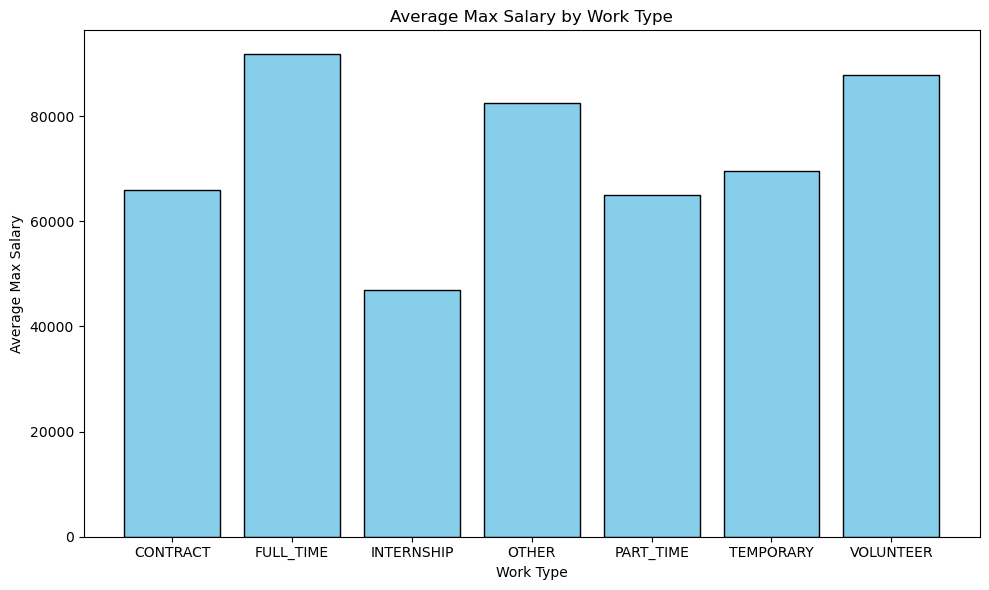

In [21]:
avg_salary_by_work_type = linkedin_df.groupby('work_type')['max_salary'].mean().reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(avg_salary_by_work_type['work_type'], avg_salary_by_work_type['max_salary'], color='skyblue', edgecolor='black')

ax.set_title('Average Max Salary by Work Type')
ax.set_xlabel('Work Type')
ax.set_ylabel('Average Max Salary')


plt.tight_layout()
plt.show()

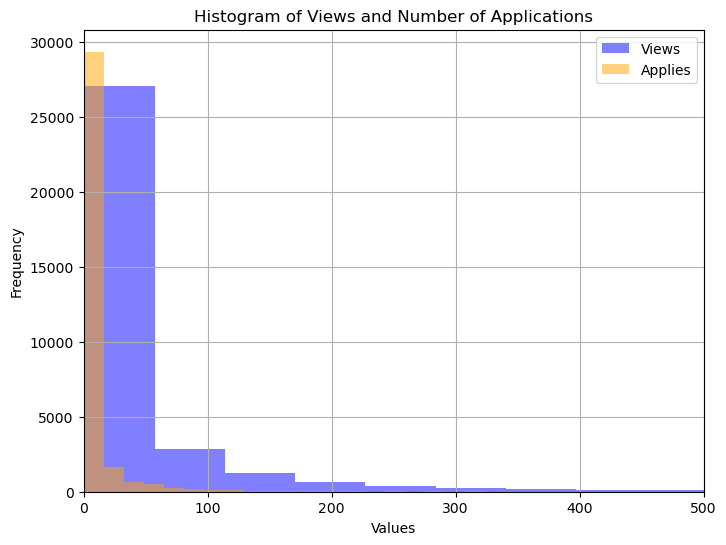

In [22]:
plt.figure(figsize=(8, 6))

linkedin_df['views'].plot(kind='hist', alpha=0.5, label='Views', bins=100, color='blue')

linkedin_df['applies'].plot(kind='hist', alpha=0.5, label='Applies', bins=100, color='orange')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Views and Number of Applications')
plt.legend()
plt.grid(True)

plt.xlim(0, 500)

plt.show()


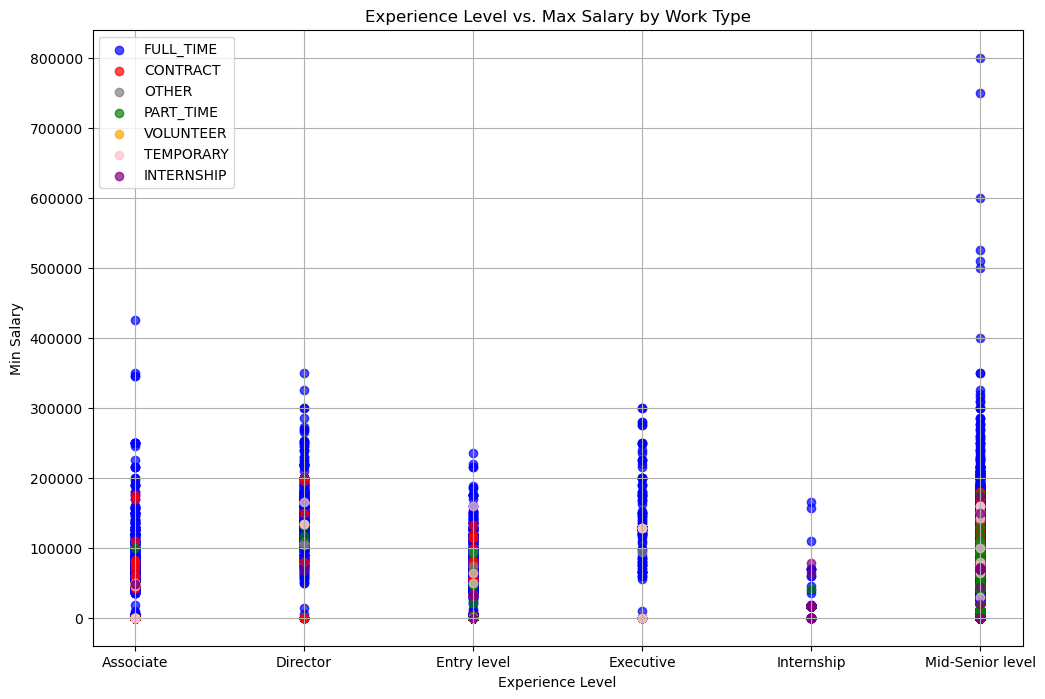

In [23]:
linkedin_df['experience_level_code'] = pd.Categorical(linkedin_df['formatted_experience_level']).codes
colors = {
    'FULL_TIME': 'blue',
    'PART_TIME': 'green',
    'CONTRACT': 'red',
    'INTERNSHIP': 'purple',
    'VOLUNTEER': 'orange',
    'TEMPORARY': 'pink',
    'OTHER': 'grey'
}

work_types = linkedin_df['work_type'].unique()
color_list = [colors[work_type] for work_type in work_types]

plt.figure(figsize=(12, 8))

for work_type in work_types:
    subset = linkedin_df[linkedin_df['work_type'] == work_type]
    plt.scatter(subset['experience_level_code'], subset['min_salary'], color=colors[work_type], label=work_type,alpha=0.7
    )
experience_labels = pd.Categorical(linkedin_df['formatted_experience_level']).categories
plt.xticks(ticks=range(len(experience_labels)), labels=experience_labels)


plt.title('Experience Level vs. Max Salary by Work Type')
plt.xlabel('Experience Level')
plt.ylabel('Min Salary')

plt.legend()

plt.grid(True)

plt.show()

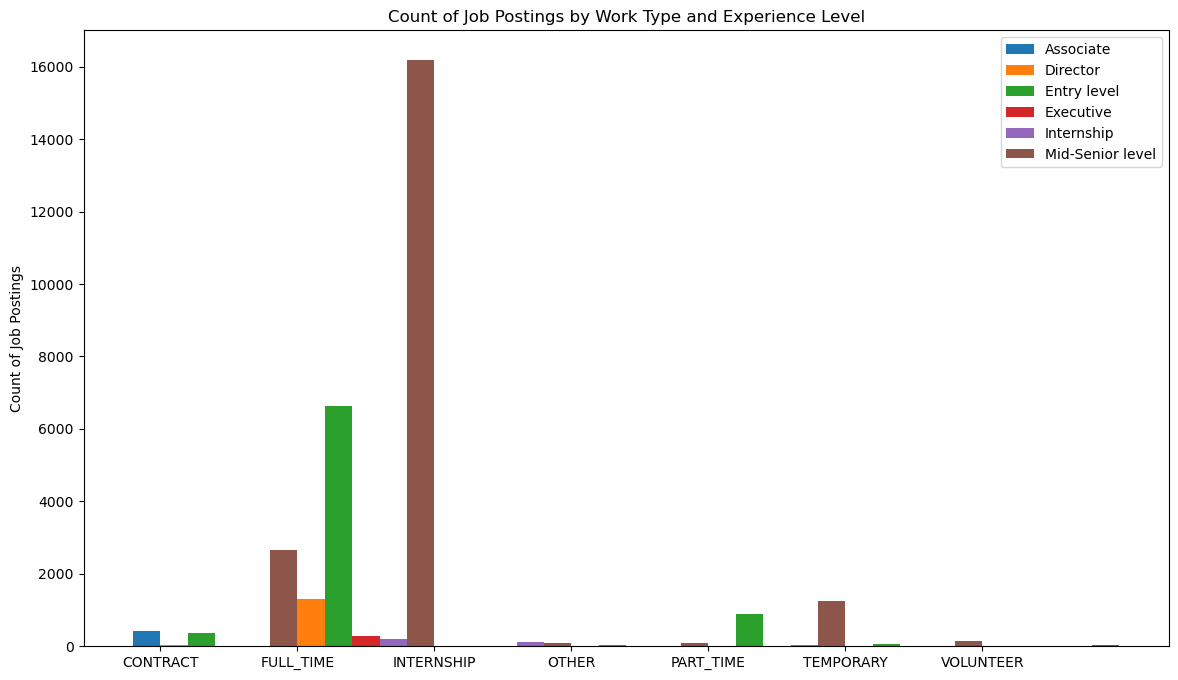

In [24]:
grouped_data = linkedin_df.groupby(['work_type', 'formatted_experience_level']).size().unstack(fill_value=0)

x = np.arange(len(grouped_data))  # label locations
width = 0.2  

fig, ax = plt.subplots(figsize=(14, 8))

for i, level in enumerate(grouped_data.columns):
    ax.bar(x - width/2 + i * width, grouped_data[level], width, label=level)

ax.set_ylabel('Count of Job Postings')
ax.set_title('Count of Job Postings by Work Type and Experience Level')
ax.set_xticks(x)
ax.set_xticklabels(grouped_data.index)
ax.legend()

plt.show()

In [25]:
linkedin_df.columns

Index(['job_id', 'company_id', 'title', 'description', 'max_salary',
       'med_salary', 'min_salary', 'formatted_work_type', 'location',
       'applies', 'original_listed_time', 'views', 'job_posting_url',
       'application_type', 'expiry', 'formatted_experience_level',
       'listed_time', 'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type', 'scraped', 'experience_level_code'],
      dtype='object')